# K-Means Clustering
__*Unsupervised machine learning__

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
df = pd.read_csv("data\incomes.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Micheal,29,90000
2,Mchan,29,61000
3,Hussein,28,60000
4,Kory,42,150000


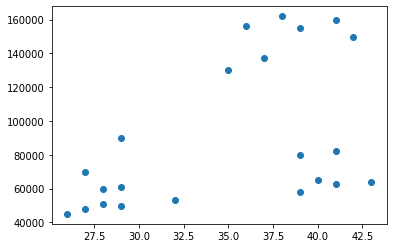

In [40]:
# visualizing on a scatter plot
plt.scatter(df['Age'],df['Income($)'])

In [41]:
# for this particular case choosing K is straight forward which is 3 clusters
km = KMeans(n_clusters=3)
km # you can tune the parameters bellow

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
# fit and predict [different from supervised learning]
y_predicted = km.fit_predict(df[['Age','Income($)']])
# so the model created 3 clusters by assigning the labels
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [43]:
# appending clusters to the main data frame
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Micheal,29,90000,0
2,Mchan,29,61000,2
3,Hussein,28,60000,2
4,Kory,42,150000,1


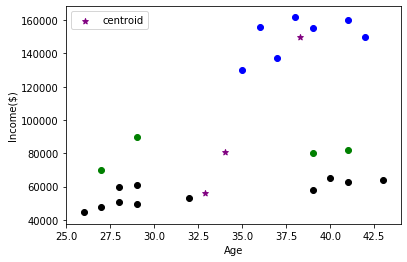

In [44]:
# first we seperate the three clusters into 3 different data frames
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
# plotting the clustering results
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple', marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [48]:
# there's a problem with the lower groups clusters(have impurities).
# the problem happens because scaling in the plot doesn't start at 0
# THE SOLUTION: we use MinMaxScaler
scaler =  MinMaxScaler()
scaler.fit(df[['Income($)']])           # try to make the scaling to be 0-1 on y-axis
df['Income($)'] = scaler.transform(df[['Income($)']])  # transforms the values between 0-1 range then swap the old ones

scaler.fit(df[['Age']]) 
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Micheal,0.176471,0.384615,0
2,Mchan,0.176471,0.136752,0
3,Hussein,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [49]:
# using KMeans algorithm once again on this preprocessed data
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [50]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Micheal,0.176471,0.384615,2
2,Mchan,0.176471,0.136752,2
3,Hussein,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gavine,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Teddy,0.588235,0.948718,1
9,Argentina,0.529412,0.726496,1


In [53]:
# centroids
# in ploting this [:,0] means - : is for all the rows and 0 for first column
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

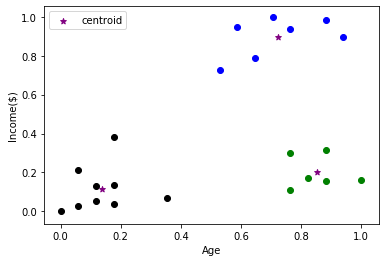

In [51]:
# visualize the data again
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
# plotting the clustering results
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple', marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [52]:
# here we see it worked perfectly

__Elbow-plot method__<br>
*for a real world problem with many features solving it as above will be so hard, that's where elbow-plot comes in

In [54]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    # getting sse
    sse.append(km.inertia_)

In [55]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.26217927623452125,
 0.22443334487241418,
 0.16869711728567785,
 0.1326541982724516,
 0.10188787724979424]

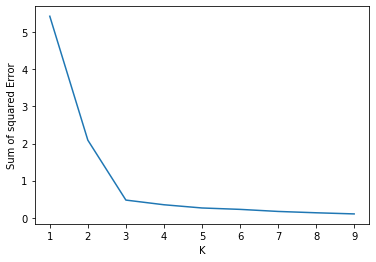

In [56]:
# let's plot that
plt.xlabel('K')
plt.ylabel('Sum of squared Error')
plt.plot(k_range,sse)

In [ ]:
# our Elbow is at K=3 and for truth it is 3 clusters